**Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:**
* Loan_ID
* Gender
* Married
* Dependents
* Education
* Self_Employed
* ApplicantIncome
* CoapplicantIncome
* Loan_Amount
* Loan_Amount_Term
* Credit History
* Property_Area
**Dependent Variable (Target Variable):**
* Loan_Status
**You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.**

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
data=pd.read_csv("loan_prediction.csv")

In [3]:
#checking overview of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#checking shape 
data.shape

(614, 13)

**So we can see that there are about 614 rows and 13 columns in the dataset.**

In [5]:
#checking columns
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**This are the columns which are there in the dataset.**

In [6]:
#checking for data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**So in this we can see that there 4 columsn with float data type, 1 column with integer data type and 8 columns with object data type that is string.and also we can see that there are missing data from columns gender,married,dependents,self employed,loan amount,loan amount term and credit history.**

In [7]:
#checking for null values
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**So we can see that in column gender there are 13 null values, in married 3,in dependents 15,in Self Employed 32,in Loan Amount 22,in Loan Amount Term 14 and in credit history 50 null values are there.**              

In [8]:
#treating the null values
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].median())

In [9]:
#checking for null values
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**so we can see that all the null values haven been removed from the dataset.**

**since loan id is just a an column with numeric number so i dont find it usefull so dropping that column.**

In [10]:
#dropping column loan id
data=data.drop(['Loan_ID'],axis=1)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**so we can see that the column load id have been dropped.**

In [11]:
#checking for duplicates
data.duplicated().sum()

0

**so we can see that there are no duplicates present in the dataset.**

In [12]:
#checking for description of the dataset
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


**Observation**
* **In this we can see that in applicant income column there is huge difference between 75% and max same in case of column ca applicant income and loan amount.**
* **In column applicant home and co applicant home mean is less than standard deviation.**
* **In column coapplicant income we can see that min is 0.0 which is mnpot possible.**
* **So by looking at this we can say that the data is normally distributed and there is skewness present.**

In [13]:
#checking for unique values
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

**In gender column two classes are there, that is male and female.**

In [14]:
#checking for unique values
data['Married'].unique()

array(['No', 'Yes'], dtype=object)

**In this column two classes are there that is yes or no, meaning whether you are married or not.**

In [15]:
#checking for unique values
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

**In this column four values are there, that is 0,1,2 and 3+ meaning whether there are any dependent if yes how many one or two or more than 3.**

In [16]:
#checking for unique values
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

**In this column they have given the information about the applicant education whether he is graduate or non graduate.**

In [17]:
#checking for unique values
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

**In this column they have given the information about the employement of an applicant whether he is self employed or not.**

In [18]:
#checking for unique values
data['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

**In this column they have given the information of applicants income.**

In [19]:
#checking for number of unique values
data['ApplicantIncome'].nunique()

505

**So there are about 505 unique values in this column.**

In [20]:
#checking for unique values
data['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

**In this column they have the given information about the co applicants income.**

In [203]:
#checking for number of unique values
data['CoapplicantIncome'].nunique()

287

**So there are about 287 unique values present in this column.**

In [204]:
#checking for unique values
data['LoanAmount'].unique()

array([128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70., 109.,
       200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315., 116.,
       112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320., 144.,
       184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97., 135.,
       180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187., 113.,
       176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,  25.,
       137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,  85.,
       259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242., 129.,
        30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87., 101.,
       495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,  90.,
       166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,  42.,
       280., 140., 155., 123., 279., 192., 304., 330., 150., 207., 436.,
        78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300., 376.,
       117.,  71., 490., 173.,  46., 228., 308., 23

**In this column they have given the information about how much loan amount does the applicant needs.**

In [205]:
#checking for number of unique values
data['LoanAmount'].nunique()

203

**So in this column there are about 203 unique values present in this column.**

In [206]:
#checking for unique values
data['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

**So in this column they bhave given the information about the term of the loan.**

In [207]:
#checking for number of unique values
data['Loan_Amount_Term'].nunique()

10

**so there are about 10 unique values present in  this column.**

In [208]:
#checking for unique values
data['Credit_History'].unique()

array([1., 0.])

**In this column they have given the information about the applicants credit history.**

In [209]:
#checking for unique values
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

**In this column they have given information about the property area of the applicant whether it is in urban or rural or in semiurban area.**

In [210]:
#checking for unique values
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

**In this column we can see whether the loan is approved or not for a particular applicant.**

**Checking for values counts**

In [211]:
#checking for value counts
data.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

**In this we can see that there 502 male and 122 female applicant are there.**

In [212]:
#checking for value counts
data.Married.value_counts()

Yes    401
No     213
Name: Married, dtype: int64

**In this we can see that among all the applicants 401 are married and 213 are not married.**

In [213]:
#checking for value counts
data.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

**In this we can see that 360 applicants does not have any dependent,102 applicant have 1 dependent, 101 applicant have 2 dependent and 51 applicant have 3 and more applicant.**

In [214]:
#checking for value counts
data.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

**In this we can see that 480 applicant are graduates and 134 are not graduate.**

In [215]:
#checking for value counts
data.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

**In this we can see that 532 applicants are not self employed and 82 are self employed.**

In [216]:
#checking for value counts
data.ApplicantIncome.value_counts()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

**In this we can see that most of the applicant have 2500 as income that is  9 of the applicant have that income.**

In [217]:
#checking for value counts
data.CoapplicantIncome.value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

**In this we can see that 273 coapplicant income is 0.0 which is not possible.**

In [218]:
#checking for value counts
data.LoanAmount.value_counts()

128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

**Most of the applicants loan amount value is 128 that around 33 applicant have asked for that loan amount value.**

In [219]:
#checking for value counts
data.Loan_Amount_Term.value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

**In this we can see that 526 applicant have loan amount term of 360 and only one applicant have loan amount term of 12.**

In [220]:
#checking for value counts
data.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

**Most of the applicants credit history is 1.0 that is around 525 applicants and around 89 applicants credit history is 0.0.**

In [221]:
#checking for value counts
data.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

**In this we can see that around 233 applicants property area is in semiurban, around 202 applicants property area is in urban and around 179 applicants property area is in rural.**

In [222]:
#checking for value counts
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

**In this we can see that around 422 applicants loan have been passed and around 192 applicants loan have not been passed.and i can see that this data is imbalanced.so further i will use smote technique to balance the data.**

**Observation**
* **In column dependent there is one unique value that is 3+ is a string type and all the other numbers are integer type, so replacing 3+ to 3.and also changing the data type of dependent fro object to integer**

In [21]:
#replacing 3+ to 3
data['Dependents']=data['Dependents'].replace({'3+':3})

In [22]:
#checking whether the 3+ is being replaced by 3 or not
data.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

**so we can see that 3+ have been replaced to 3.**

In [225]:
#checking for data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


**so we can see that the data type of dependents is object type, so changing it to integer type.**

In [23]:
data['Dependents']=data['Dependents'].astype(int)

In [24]:
#checking for data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


**Now we can see that dependents data type have been changed to integer type.**

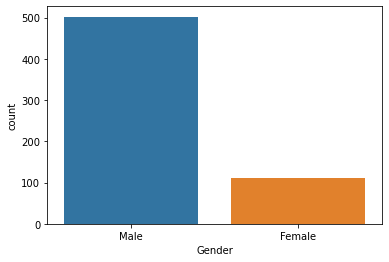

In [228]:
#ploting count plot
sns.countplot(x='Gender',data=data)
plt.show()

**In this plot we can see that the people who have applied for loan have more number of males than that of women.**

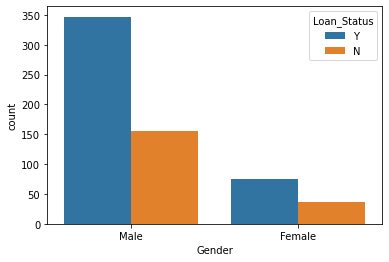

In [229]:
#ploting count plot
sns.countplot(x='Gender',hue='Loan_Status',data=data)
plt.show()

**By looking at the plot we can see that more number of males loan have been approved and also more number of males loan have not been approved.**

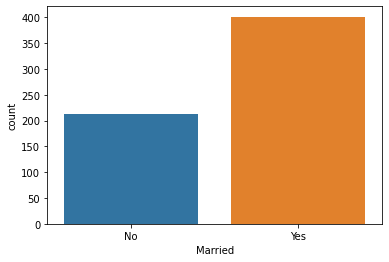

In [230]:
#ploting count plot
sns.countplot(x='Married',data=data)
plt.show()

**In this plot we can see that most of the applicants are married.**

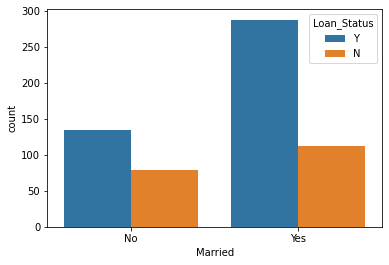

In [231]:
#ploting count plot
sns.countplot(x='Married',hue='Loan_Status',data=data)
plt.show()

**In this plot we can see that more number of married applicants loan have been approved and also more number of married loan have not been approved.**

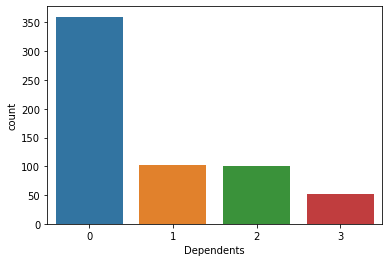

In [232]:
#ploting count plot
sns.countplot(x='Dependents',data=data)
plt.show()

**In  this plot we can see that most of the applicant does not have any dependent and very few of them have 3 dependents.**

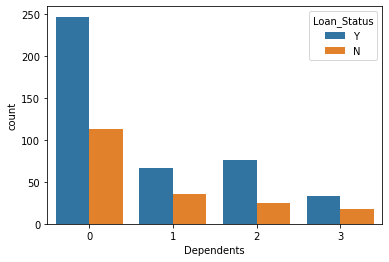

In [233]:
#ploting count plot
sns.countplot(x='Dependents',hue='Loan_Status',data=data)
plt.show()

**In this plot we can see that applicants with no dependent loan have been approved the most as well as aplicants with no dependent loan have not been approved the most.**

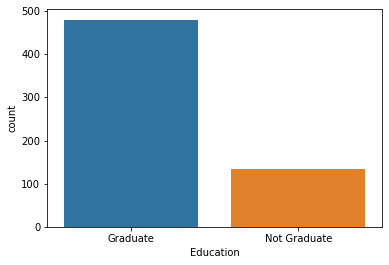

In [234]:
#ploting count plot
sns.countplot(x='Education',data=data)
plt.show()

**In this plot we can see that most of the applicant are graduate as compared to the other applicants who are not graduate.**

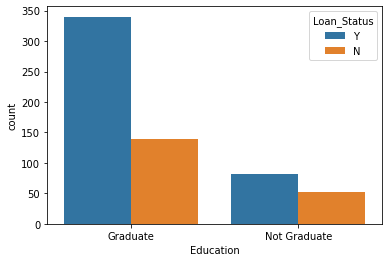

In [235]:
#ploting count plot
sns.countplot(x='Education',hue='Loan_Status',data=data)
plt.show()

**In this plot we can see that applicant who are graduates there loan have been approved the most as well as have not been aprroved the most.**

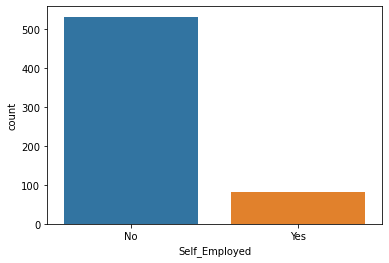

In [236]:
#ploting count plot
sns.countplot(x='Self_Employed',data=data)
plt.show()

**By looking at the plot we can see that most of the applicant are not self employed whereas as less than 100 applicant are self employed.**

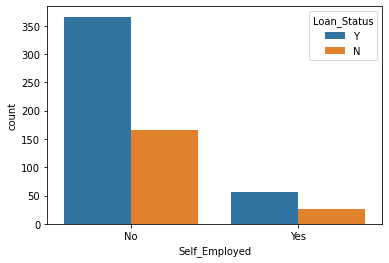

In [86]:
#ploting count plot
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data)
plt.show()

**By looking at the plot we can see that applicants who are not self employed their loan have approved the most as well as their loan have not been approved the most.**

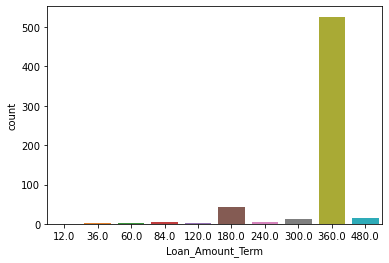

In [78]:
#ploting count plot
sns.countplot(x='Loan_Amount_Term',data=data)
plt.show()

**By looking at the plot we can see that Most of the applicant have loan amount term of 360 momths.**

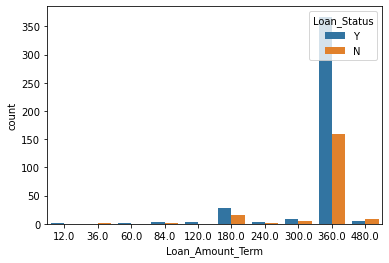

In [87]:
#ploting count plot
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=data)
plt.show()

**In this plot we can see that applicant having 360 as loan amount term their loan have been approved the most and also their loan have not been approved the most.**

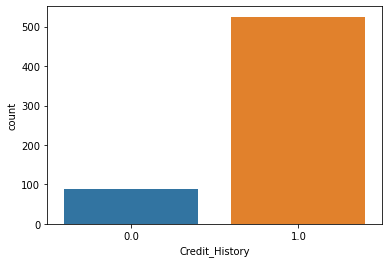

In [79]:
#ploting count plot
sns.countplot(x='Credit_History',data=data)
plt.show()

**By looking at the plot we can see that Most of the applicants credit history is 1.0 and less than 100 applicants credit history is 0.0.**

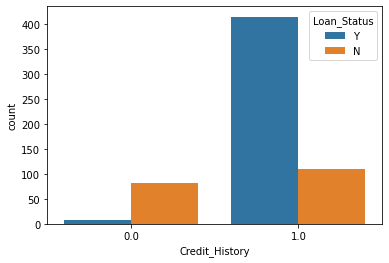

In [88]:
#ploting count plot
sns.countplot(x='Credit_History',hue='Loan_Status',data=data)
plt.show()

**In this plot we can see that applicant with credit history 1.0 their loan have been approved the most and also their loan have not been approved the most.**

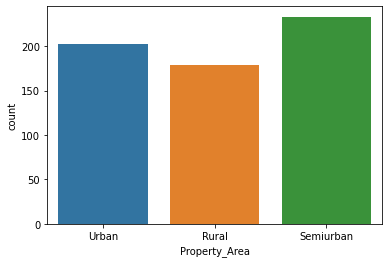

In [80]:
#ploting count plot
sns.countplot(x='Property_Area',data=data)
plt.show()

**By looking at the plot we can see that most of the applicant are from semiurban property area.**

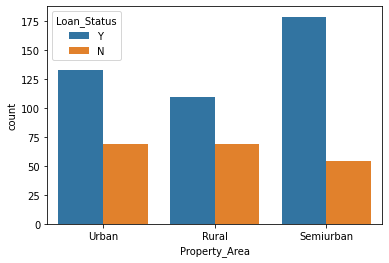

In [89]:
#ploting count plot
sns.countplot(x='Property_Area',hue='Loan_Status',data=data)
plt.show()

**In this plot we can see that applicant with semiurban peoperty area, their loan have been approved the most and applicants with urban and rural property area, their loan have not been approved the most.**

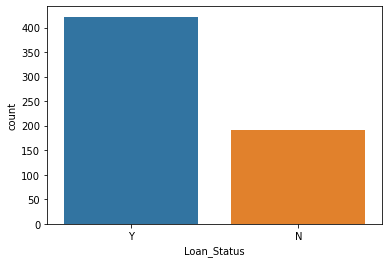

In [81]:
#ploting count plot
sns.countplot(x='Loan_Status',data=data)
plt.show()

**By looking at the plot we can see that most of the applicant loan have been approved while less than 200 applicants loan have not been approved.**

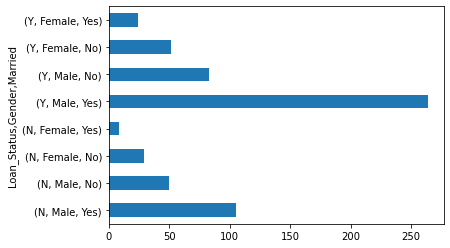

In [96]:
#plotting bar plot
data.groupby('Loan_Status')['Gender','Married'].value_counts().plot.barh()
plt.show()

**In this plot we can see that the applicant who are male and married there loan have been approved the most.And applicants who are female and who are not married their loan have been approved the most**

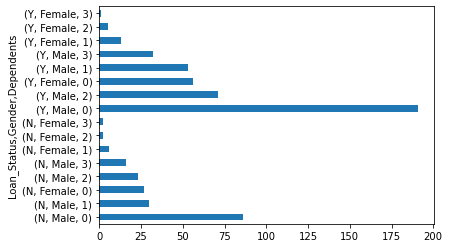

In [108]:
#plotting bar plot
data.groupby('Loan_Status')['Gender','Dependents'].value_counts().plot.barh()
plt.show()

**In this plot we can see that male applicant with no dependent have got most of the loan approval and female applicant with no dependent got the most of the loan approval.**

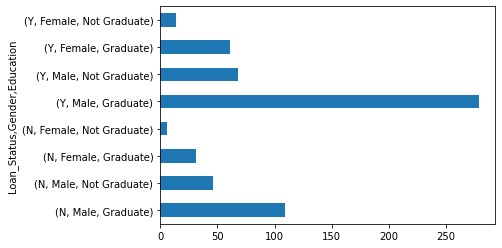

In [110]:
#plotting bar plot
data.groupby('Loan_Status')['Gender','Education'].value_counts().plot.barh()
plt.show()

**In this plot we can see that male applicants who has done graduate have got most of the loan approval and female applicant with graduate have most of the loan approval.**

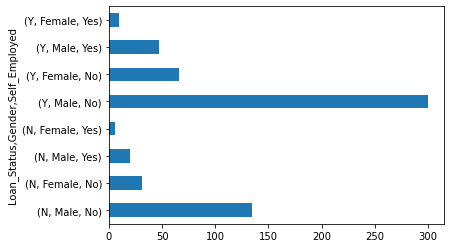

In [111]:
#plotting bar plot
data.groupby('Loan_Status')['Gender','Self_Employed'].value_counts().plot.barh()
plt.show()

**In this plot we can see that male applicant which are not sel employed have got the most of the loan approvals same as in the case of females which are not self employed have got most of the loan approvals.**

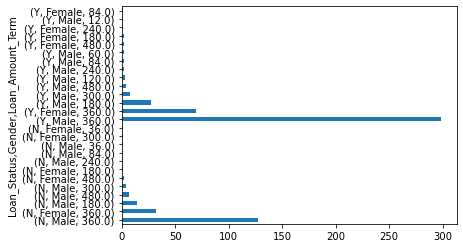

In [114]:
#plotting bar plot
data.groupby('Loan_Status')['Gender','Loan_Amount_Term'].value_counts().plot.barh()
plt.show()

**In this plot we can see that male as well as female applicant who have loan amount term of 360months have got most of the loan approvals.**

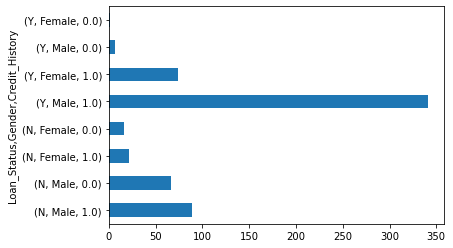

In [238]:
#plotting bar plot
data.groupby('Loan_Status')['Gender','Credit_History'].value_counts().plot.barh()
plt.show()

**By looking at the plot we can see that male as well as female applicant with credit history 1.0 have got most of the loan approvals**

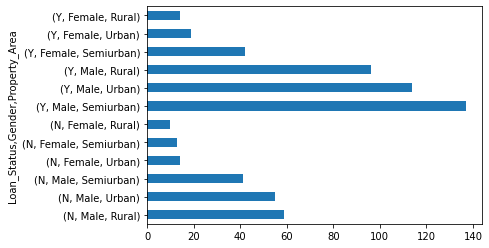

In [116]:
#plotting bar plot
data.groupby('Loan_Status')['Gender','Property_Area'].value_counts().plot.barh()
plt.show()

**In this plot we can see that male as well as female applicant who have property area in semiurban region have got most of the loan approvals.**

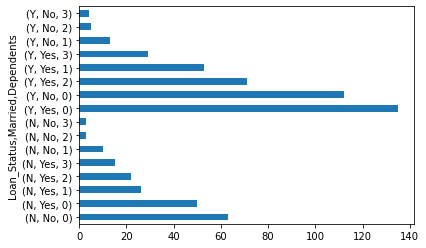

In [117]:
#plotting bar plot
data.groupby('Loan_Status')['Married','Dependents'].value_counts().plot.barh()
plt.show()

**In this plot we can see that married applicant with 0 dependent have got most of the loan approavls.**

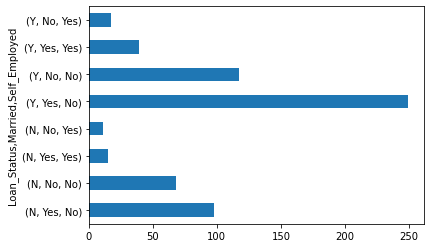

In [118]:
#plotting bar plot
data.groupby('Loan_Status')['Married','Self_Employed'].value_counts().plot.barh()
plt.show()

**In this plot we see that married applicant which not self employed have got the most of the loan approvals.**

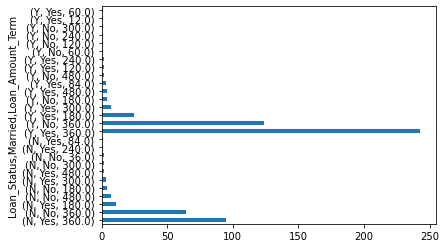

In [119]:
#plotting bar plot
data.groupby('Loan_Status')['Married','Loan_Amount_Term'].value_counts().plot.barh()
plt.show()

**In this plot we can see that married applicant with loan amount term of 360 months have got the most of the loan approvals.**

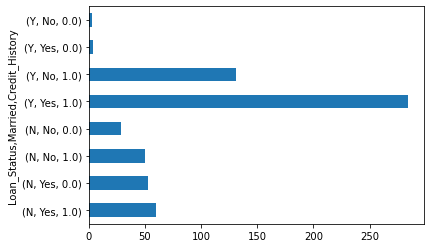

In [120]:
#plotting bar plot
data.groupby('Loan_Status')['Married','Credit_History'].value_counts().plot.barh()
plt.show()

**In this plot we can see that married applicant with credit history 1.0 have got most of the loan approvals.**

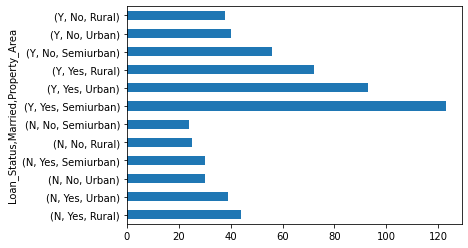

In [240]:
#plotting bar plot
data.groupby('Loan_Status')['Married','Property_Area'].value_counts().plot.barh()
plt.show()

**In this plot we can see that married applicant which have a property area in semiurban region have got the most of the loan approvals.**

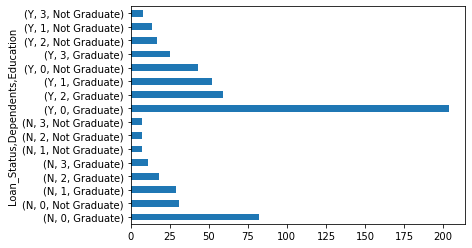

In [125]:
#plotting bar plot
data.groupby('Loan_Status')['Dependents','Education'].value_counts().plot.barh()
plt.show()

**By looking at the plot we can see that applicant having o dependents who are gradaute have got most of the loan approvals.**

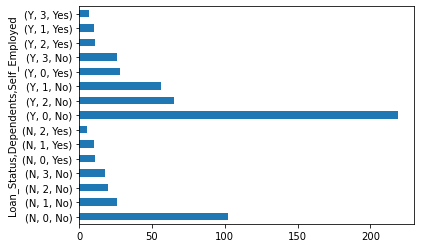

In [126]:
#plotting bar plot
data.groupby('Loan_Status')['Dependents','Self_Employed'].value_counts().plot.barh()
plt.show()

**In this plot we can see that applicant with 0 dependent which not self employed have got the most of the loan approvals.**

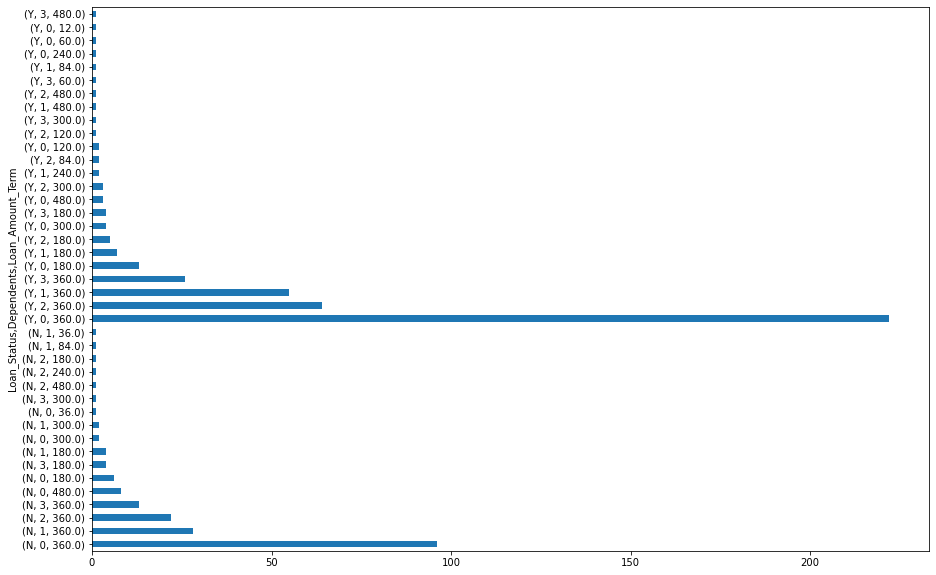

In [241]:
#plotting bar plot
plt.figure(figsize=(15,10))
data.groupby('Loan_Status')['Dependents','Loan_Amount_Term'].value_counts().plot.barh()
plt.show()

**In this plot we can see that applicant with o dependent having loan amount term as 360 months have got the most of the loan approvals.**

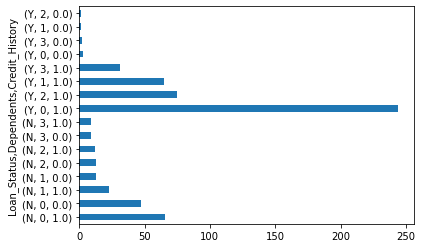

In [128]:
#plotting bar plot
data.groupby('Loan_Status')['Dependents','Credit_History'].value_counts().plot.barh()
plt.show()

**In this plot we can see that applicant with 0 dependent and having credit history as 0 have got most of the loan approvals.**

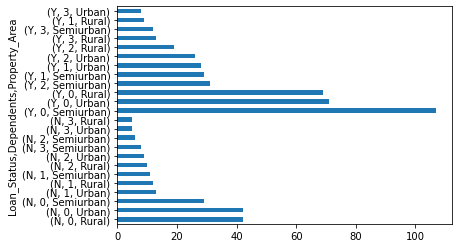

In [129]:
#plotting bar plot
data.groupby('Loan_Status')['Dependents','Property_Area'].value_counts().plot.barh()
plt.show()

**In this plot we can see that applicant with 0 dependent having property area in semiurban region have got the most of the loan approvals.**

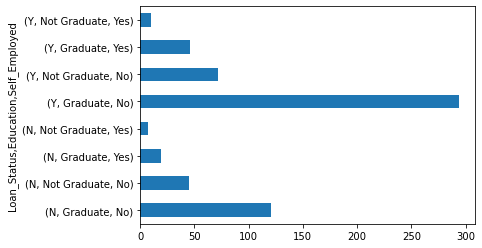

In [130]:
#plotting bar plot
data.groupby('Loan_Status')['Education','Self_Employed'].value_counts().plot.barh()
plt.show()

**In this plot we can see that graduate applicant which are not self employed have got most of the loan approvals.**

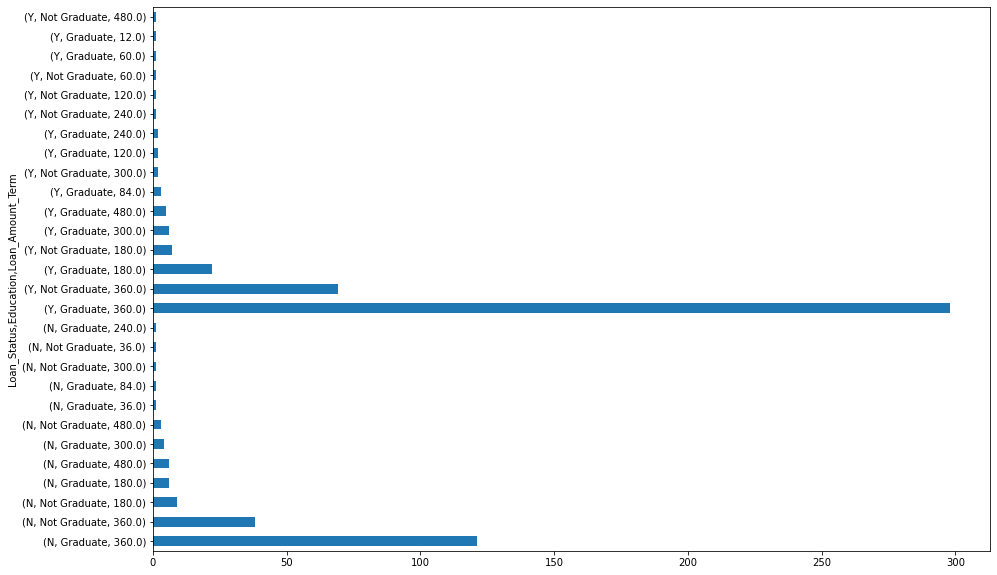

In [242]:
#plotting bar plot
plt.figure(figsize=(15,10))
data.groupby('Loan_Status')['Education','Loan_Amount_Term'].value_counts().plot.barh()
plt.show()

**In this plot we can see that graduate applicant which has loan amount term of 360 months have got most of the loan approvals.**

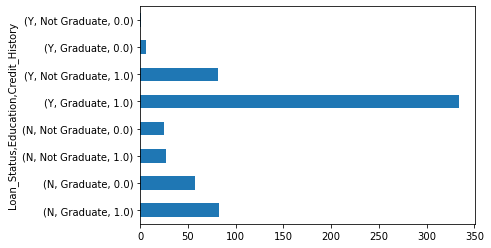

In [132]:
#plotting bar plot
data.groupby('Loan_Status')['Education','Credit_History'].value_counts().plot.barh()
plt.show()

**In this plot we can see that graduate applicant with credit history 1.0 have got most of the loan approvals.**

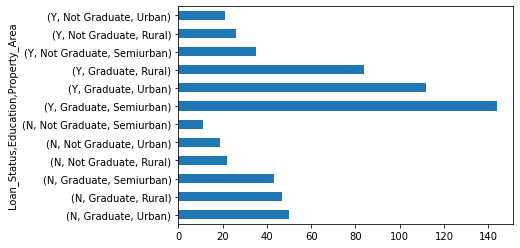

In [133]:
#plotting bar plot
data.groupby('Loan_Status')['Education','Property_Area'].value_counts().plot.barh()
plt.show()

**In this plot we can see that graduate applicant who are having property area in semiurban region have most of the loan approvals.**

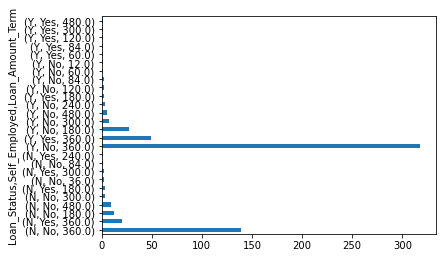

In [134]:
#plotting bar plot
data.groupby('Loan_Status')['Self_Employed','Loan_Amount_Term'].value_counts().plot.barh()
plt.show()

**In this plot we can see that applicant who are not self employed  and having loan amount term of 360months have most of the loan approvals.**

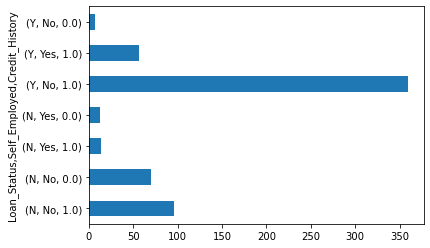

In [135]:
#plotting bar plot
data.groupby('Loan_Status')['Self_Employed','Credit_History'].value_counts().plot.barh()
plt.show()

**In this plot we can see that applicant who are not self employed and having credit history 1.0 have most of the loan approvals.** 

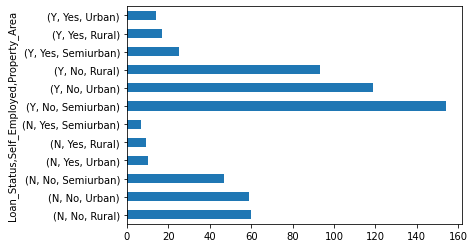

In [136]:
#plotting bar plot
data.groupby('Loan_Status')['Self_Employed','Property_Area'].value_counts().plot.barh()
plt.show()

**In this plot we can see that applicant who are not self employed and having property area in semiurban region have most of the approvals.**

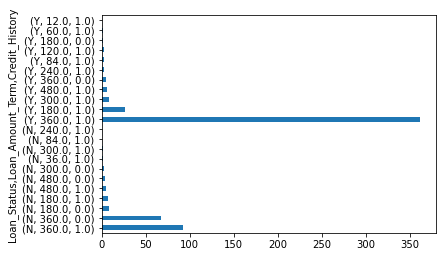

In [137]:
#plotting bar plot
data.groupby('Loan_Status')['Loan_Amount_Term','Credit_History'].value_counts().plot.barh()
plt.show()

**In this plot we can see that applicant having loan amount term as 360 months have got most of the loan approvals.**

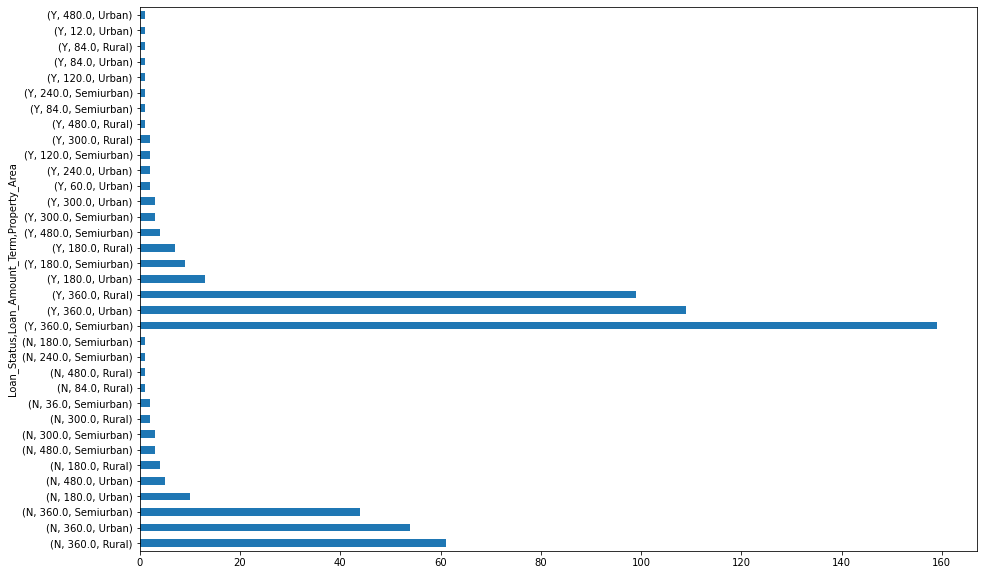

In [243]:
#plotting bar plot
plt.figure(figsize=(15,10))
data.groupby('Loan_Status')['Loan_Amount_Term','Property_Area'].value_counts().plot.barh()
plt.show()

**In this plot we can see that applicant with loan amount term as 360months have got most of the loan approvals.**

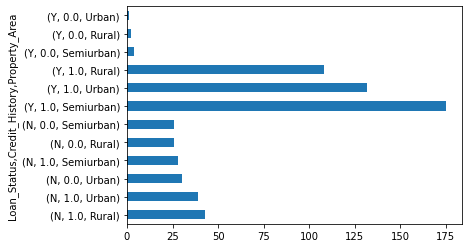

In [139]:
#plotting bar plot
data.groupby('Loan_Status')['Credit_History','Property_Area'].value_counts().plot.barh()
plt.show()

**In this plot we can see that applicant with credit history 1.0 have got the most of the loan approvals.**

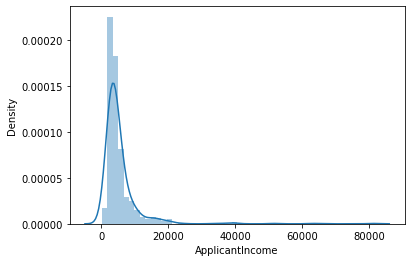

In [258]:
#plotting distribution plot
sns.distplot(data['Dependents'],kde=True)
plt.show()

**In this plot we can see that the data is not normally distributed and skewness is present.**

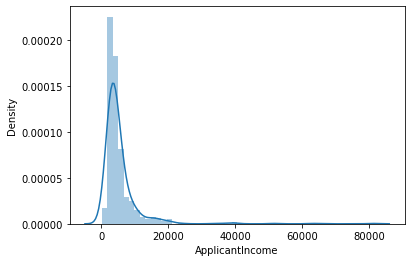

In [259]:
#plotting distribution plot
sns.distplot(data['ApplicantIncome'],kde=True)
plt.show()

**In this plot we can see that the data is not normally distributed and skewness is present.**

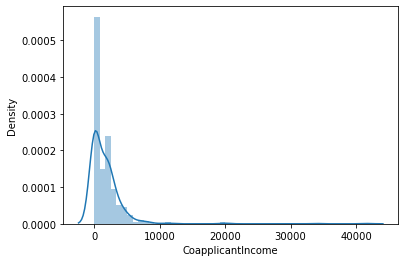

In [260]:
#plotting distribution plot
sns.distplot(data['CoapplicantIncome'],kde=True)
plt.show()

**In this plot we can see that the data is not normally distributed and skewness is present.**

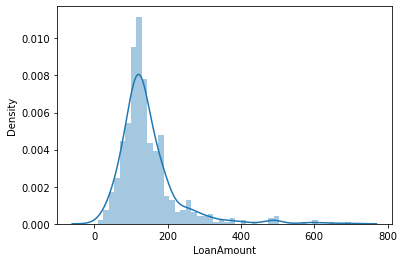

In [261]:
#plotting distribution plot
sns.distplot(data['LoanAmount'],kde=True)
plt.show()

**In this plot we can see that the data is not normally distributed and skewness is present.**

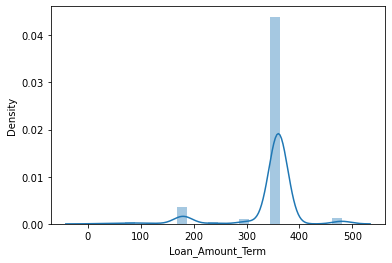

In [262]:
#plotting distribution plot
sns.distplot(data['Loan_Amount_Term'],kde=True)
plt.show()

**In this plot we can see that the data is not normally distributed and skewness is present.**

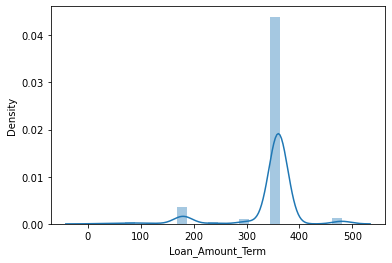

In [263]:
#plotting distribution plot
sns.distplot(data['Loan_Amount_Term'],kde=True)
plt.show()

**In this plot we can see that the data is not normally distributed and skewness is present.**

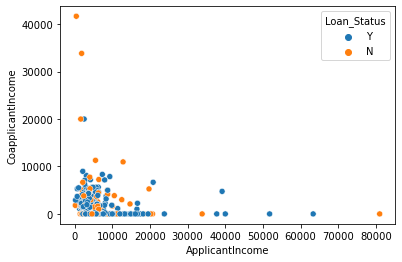

In [266]:
#plotting scatter plot
sns.scatterplot(x='ApplicantIncome',y='CoapplicantIncome',hue='Loan_Status',data=data)
plt.show()

**In this plot we can see that most of the applicant income and coapplicant income is between 0 to 20000.and we can see some of the outliers also. some of the time when the applicant income is more than 80000 loan have not benn approved same in the case of coapplicant when the income was more than 40000 loan was not approved.**

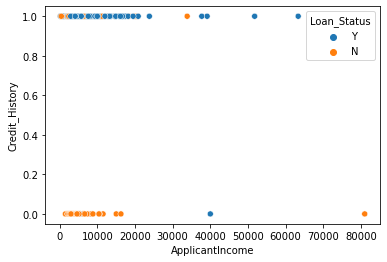

In [269]:
#plotting scatter plot
sns.scatterplot(x='ApplicantIncome',y='Credit_History',hue='Loan_Status',data=data)
plt.show()

**In this plot we can see that irrespective of the applicants income when the credit history is 0.0 most of the times loan have not been improved. Only one time when credit history is 0.0 and applicant income is 40000 that time loan have been approved.**

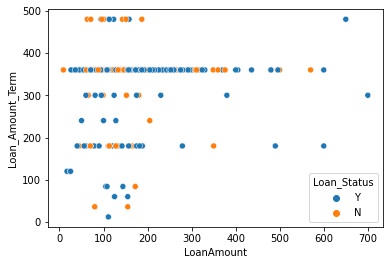

In [273]:
#plotting scatter plot
sns.scatterplot(x='LoanAmount',y='Loan_Amount_Term',hue='Loan_Status',data=data)
plt.show()

**In this plot we can see that the data is scattered and and when loan amount term is 360 most of the times loan have been approved.**

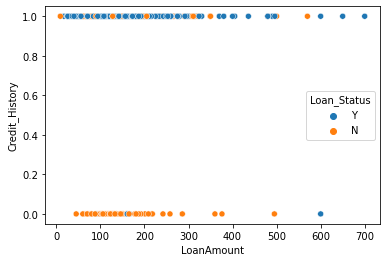

In [274]:
#plotting scatter plot
sns.scatterplot(x='LoanAmount',y='Credit_History',hue='Loan_Status',data=data)
plt.show()

**In this plot we can see that when credit history is 0.0 most of the times loan have not been approved irrespectibe of the loan amount.**

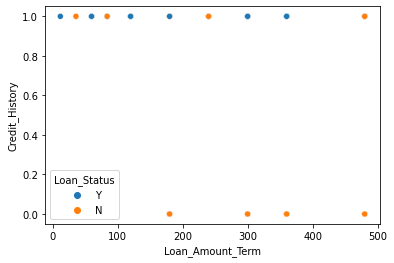

In [275]:
#plotting scatter plot
sns.scatterplot(x='Loan_Amount_Term',y='Credit_History',hue='Loan_Status',data=data)
plt.show()

**In this plot we can see that when the credit history is 0.0 most of the loans have not been approved irrespective of the loan amount term.** 

In [25]:
#Importing required libraries
from sklearn.preprocessing import LabelEncoder

In [26]:
#Encoding column
lab_enc=LabelEncoder()
df1=lab_enc.fit_transform(data['Gender'])
df2=lab_enc.fit_transform(data['Married'])
df3=lab_enc.fit_transform(data['Education'])
df4=lab_enc.fit_transform(data['Self_Employed'])
df5=lab_enc.fit_transform(data['Credit_History'])
df6=lab_enc.fit_transform(data['Property_Area'])
df7=lab_enc.fit_transform(data['Loan_Status'])

In [27]:
#Transfering the data 
data['Gender']=df1
data['Married']=df2
data['Education']=df3
data['Self_Employed']=df4
data['Credit_History']=df5
data['Property_Area']=df6
data['Loan_Status']=df7

In [28]:
#Checking whether the data is encoded or not
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1


**so we can see that the data have been encoded.**

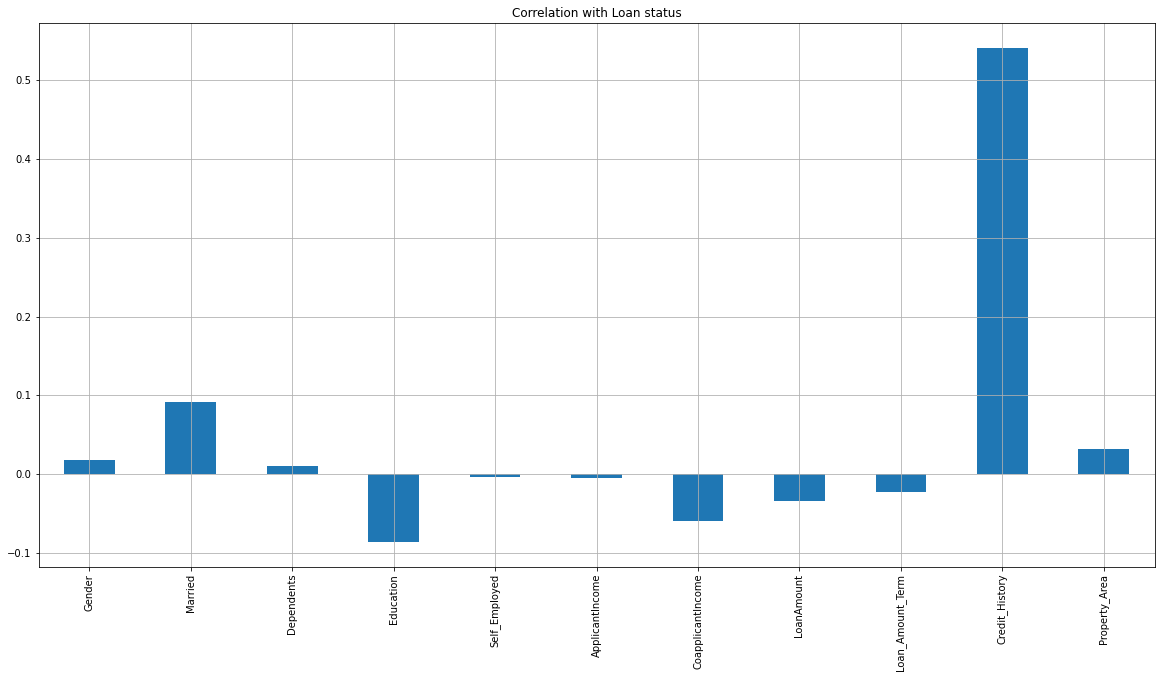

In [280]:
#Checking for correlation
data.drop(['Loan_Status'],axis=1).corrwith(data['Loan_Status']).plot(kind='bar',grid=True,figsize=(20,10),title='Correlation with Loan status')
plt.show()

**In this plot we can see that property area is highly correlated to the loan status that is label followed by credit history.And self employed, applicant income, dependendts and gender are very least correlated to  the label.**

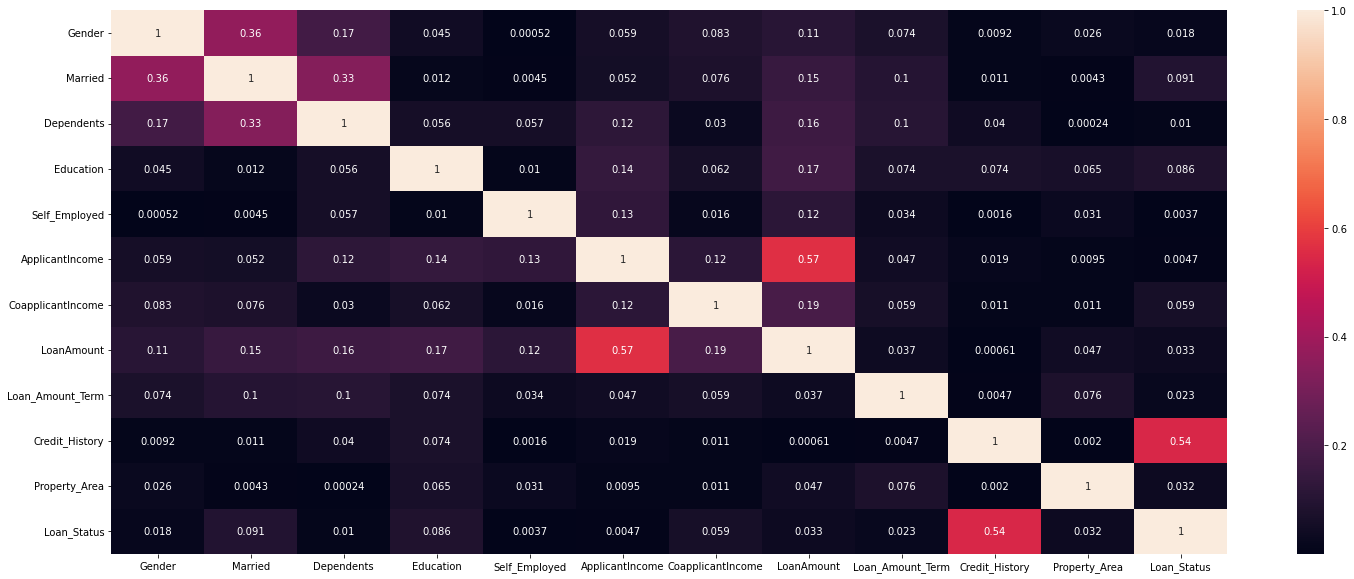

In [281]:
#Plotting heatmap
corr=data.corr().abs()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True)
plt.show()

**By looking at the heatmap we can see that not a single feature is multicorelated with the other feature.so i further i will check using vif.**

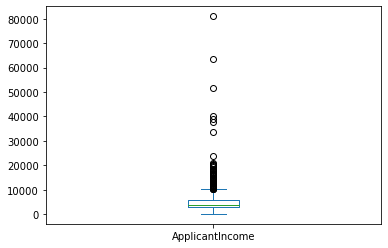

In [282]:
#Checking for outliers
data['ApplicantIncome'].plot.box()
plt.show()

**In this plot we can see that alot of outliers are present.**

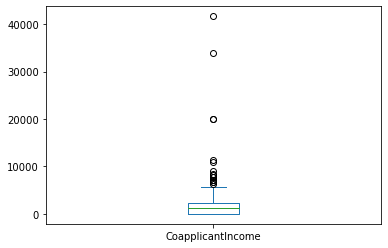

In [283]:
#Checking for outliers
data['CoapplicantIncome'].plot.box()
plt.show()

**In this plot we can see that alot of outliers are present.**

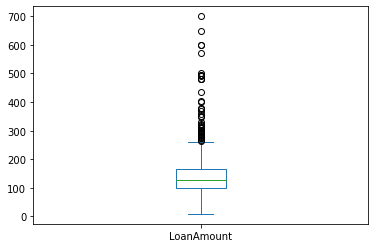

In [284]:
#Checking for outliers
data['LoanAmount'].plot.box()
plt.show()

**In this plot we can see that alot of outliers are present.**

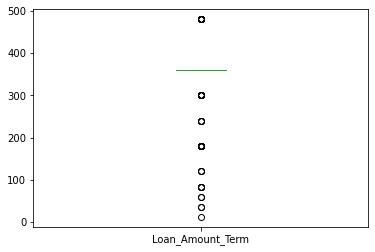

In [285]:
#Checking for outliers
data['Loan_Amount_Term'].plot.box()
plt.show()

**In this plot we can see that alot of outliers are present.**

In [29]:
#Importing required libraries
from scipy.stats import zscore

In [30]:
#Removing outliers
z_score=zscore(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])
abs_z_score=np.abs(z_score)
threshold=3
z=(abs_z_score<3).all(axis=1)

In [31]:
data=data[z]

In [32]:
data.shape

(577, 12)

In [33]:
#Percentage Loss of Data
data_loss=((614-577)/614)*100
print(f'Data Loss:{data_loss} %')

Data Loss:6.026058631921824 %


In [34]:
#checking skewness
data.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

**In this we can see that column Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term and Credit_History have skewness and rest of the columns who have value more than 0.5 are categorical data columns and we dont treat skewness of categorical data columns and label.**

In [35]:
#Importing required libraries
from sklearn.preprocessing import power_transform

In [36]:
data[['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]=power_transform(data[['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']],method='yeo-johnson')
data[['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,-0.809243,0.681780,-1.122446,0.000771,0.130788,0.418513
1,0.902869,0.234783,0.744117,0.000771,0.130788,0.418513
2,-0.809243,-0.527201,-1.122446,-1.437336,0.130788,0.418513
3,-0.809243,-0.791972,0.895786,-0.153545,0.130788,0.418513
4,-0.809243,0.728848,-1.122446,0.238260,0.130788,0.418513
...,...,...,...,...,...,...
609,-0.809243,-0.587375,-1.122446,-1.293791,0.130788,0.418513
610,1.533596,0.035386,-1.122446,-2.332692,-2.562700,0.418513
611,0.902869,1.281658,0.173344,1.845015,0.130788,0.418513
612,1.344671,1.164426,-1.122446,0.976055,0.130788,0.418513


In [37]:
#checking skewness
data.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [38]:
#Dividing dataset into features and label
#Features
x=data.drop(['Loan_Status'],axis=1)
#Label
y=data['Loan_Status']

In [39]:
#Standardiziing the data
#Importing require libraries
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaler=Scaler.fit_transform(x)
x_scaler

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.13078824,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254, -1.30652215],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.13078824,
         0.41851254,  1.22747207],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254,  1.22747207],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.13078824,
         0.41851254,  1.22747207],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.13078824,
        -2.38941464, -0.03952504]])

In [40]:
x_scaler.shape

(577, 11)

In [41]:
#Importing require libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaler,i)for i in range(x_scaler.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,1.219012,Gender
1,1.432731,Married
2,1.184693,Dependents
3,1.065059,Education
4,1.055698,Self_Employed
5,1.763387,ApplicantIncome
6,1.582230,CoapplicantIncome
7,1.549825,LoanAmount
8,1.048273,Loan_Amount_Term
9,1.008704,Credit_History


**so in this we can see that there not a single value which is more than 5.so we can say that there is no multicollinearity problem.**

In [43]:
#importing required libraries
from sklearn.feature_selection import SelectKBest, f_classif

In [44]:
best_features=SelectKBest(score_func=f_classif,k=9)
fit=best_features.fit(x_scaler,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([data_columns,data_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(9,'Score'))

         Feature_Name       Score
9      Credit_History  263.985861
3           Education    4.979459
1             Married    4.593676
6   CoapplicantIncome    3.642819
8    Loan_Amount_Term    1.848621
4       Self_Employed    0.404840
10      Property_Area    0.404285
7          LoanAmount    0.320687
2          Dependents    0.197230


**In this we can see that after using feature selection applicant income column is discarded, but logically everyone knows that applicant income is one of the most important factor while taking the loan otherwise bank does not give loans as they think if the applicant income is not upto the mark than who will repay the loan.so this is the reason iam not using the features which i got after using feature selection method.I am taking all the features.**

**As we have seen while plotting the counplot for label, we had seen that the label was not balanced so using smote technique to balance the data.**

In [45]:
#Using oversampling method-Smote method
#importing required libraries
from imblearn.over_sampling import SMOTE

In [46]:
over_samp=SMOTE(0.75)

In [47]:
x_new,y_new=over_samp.fit_resample(x_scaler,y)

In [48]:
print('The number of classes before fit {}'.format(y.value_counts()))

The number of classes before fit 1    398
0    179
Name: Loan_Status, dtype: int64


In [49]:
print('The number of classes after fit {}'.format(y_new.value_counts()))

The number of classes after fit 1    398
0    298
Name: Loan_Status, dtype: int64


In [50]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

**Logistic Regression**

In [51]:
#instantiating the model
lr=LogisticRegression()

In [52]:
#using range fucntion to find the best random state using Logestic regression
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f'at random state{i},the training accuracy is:{accuracy_score(y_train,pred)*100}')
    print(f'at random state{i},the testing accuracy is:{accuracy_score(y_test,y_pred)*100}')
    print('\n')

at random state0,the training accuracy is:74.71264367816092
at random state0,the testing accuracy is:82.18390804597702


at random state1,the training accuracy is:74.52107279693486
at random state1,the testing accuracy is:80.45977011494253


at random state2,the training accuracy is:76.24521072796935
at random state2,the testing accuracy is:72.98850574712644


at random state3,the training accuracy is:77.77777777777779
at random state3,the testing accuracy is:71.83908045977012


at random state4,the training accuracy is:76.24521072796935
at random state4,the testing accuracy is:76.4367816091954


at random state5,the training accuracy is:77.01149425287356
at random state5,the testing accuracy is:74.13793103448276


at random state6,the training accuracy is:74.71264367816092
at random state6,the testing accuracy is:79.88505747126436


at random state7,the training accuracy is:78.73563218390804
at random state7,the testing accuracy is:70.6896551724138


at random state8,the training accu

**Taking random state as 5.**

In [53]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=5)

In [54]:
#Building Model to test unexposed data
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        print('\n=====Train Score=====')
        print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
    elif train==False:
        y_pred=clf.predict(x_test)
        print('\n=====Test Score=====')
        print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')
        print('\n Test Classification Report:\n',classification_report(y_test,y_pred,digits=2))
        print('\n Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
        print('\n F1 Score:\n',f1_score(y_test,y_pred,average='micro'))

In [55]:
#Training the data
lr.fit(x_train,y_train)

LogisticRegression()

In [56]:
#calling the function and passing the dataset for logistic regression
metric_score(lr,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(lr,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:77.01%

=====Test Score=====
Accuracy Score:74.14%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.46      0.62        78
           1       0.69      0.97      0.81        96

    accuracy                           0.74       174
   macro avg       0.81      0.72      0.71       174
weighted avg       0.79      0.74      0.72       174


 Confusion Matrix:
 [[36 42]
 [ 3 93]]

 F1 Score:
 0.7413793103448276


In [57]:
#Checking Cross Validation score
#Importing required libraries
from sklearn.model_selection import cross_val_score

In [58]:
y_pred=lr.predict(x_test)
test_accuracy=accuracy_score(y_test,y_pred)

In [59]:
#Checking cross validation score
for j in range(2,6):
    cv_score=cross_val_score(lr,x_new,y_new,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is{cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 2 the cv score is0.7413793103448276and accuracy for the testing is 0.7413793103448276


at cross fold 3 the cv score is0.7442528735632185and accuracy for the testing is 0.7413793103448276


at cross fold 4 the cv score is0.7485632183908045and accuracy for the testing is 0.7413793103448276


at cross fold 5 the cv score is0.7557656731757451and accuracy for the testing is 0.7413793103448276




**Taking cv=2.**

In [60]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [61]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.53846154 1.        ]
TPR [0.      0.96875 1.     ]
Threshold [2 1 0]


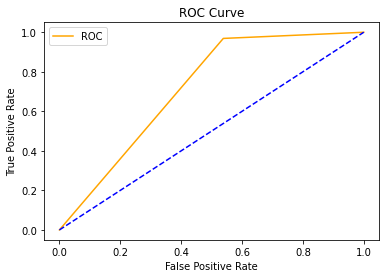

In [62]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**RandomForest Classifier**

In [63]:
#Instantiating the model
rfc=RandomForestClassifier()

In [64]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=5)

In [65]:
#Training the data
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
#calling the function and passing the dataset for random forest
metric_score(rfc,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(rfc,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:100.00%

=====Test Score=====
Accuracy Score:83.33%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.79        78
           1       0.80      0.93      0.86        96

    accuracy                           0.83       174
   macro avg       0.85      0.82      0.83       174
weighted avg       0.84      0.83      0.83       174


 Confusion Matrix:
 [[56 22]
 [ 7 89]]

 F1 Score:
 0.8333333333333334


In [67]:
#Checking cross validation score
cv_score=cross_val_score(rfc,x_new,y_new,cv=2).mean()
cv_score

0.7859195402298851

In [68]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [69]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.53846154 1.        ]
TPR [0.      0.96875 1.     ]
Threshold [2 1 0]


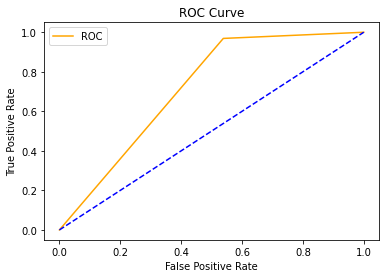

In [70]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Gradient Boosting Classifier**

In [71]:
#Initiating Gradient Boosting classifier
gb=GradientBoostingClassifier()

In [73]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=5)

In [74]:
#Training the data
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [75]:
#calling the function and passing the dataset for gradient boosting
metric_score(gb,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(gb,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:91.38%

=====Test Score=====
Accuracy Score:79.89%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.63      0.74        78
           1       0.76      0.94      0.84        96

    accuracy                           0.80       174
   macro avg       0.82      0.78      0.79       174
weighted avg       0.82      0.80      0.79       174


 Confusion Matrix:
 [[49 29]
 [ 6 90]]

 F1 Score:
 0.7988505747126436


In [76]:
#Checking cross validation score
cv_score=cross_val_score(gb,x_new,y_new,cv=2).mean()
cv_score

0.7686781609195402

In [77]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [78]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.53846154 1.        ]
TPR [0.      0.96875 1.     ]
Threshold [2 1 0]


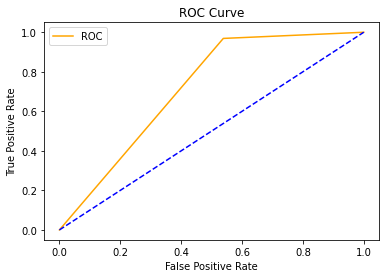

In [79]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Ada Boost Classifier**

In [80]:
#Initiating Ada Boost classifier
ada=AdaBoostClassifier()

In [81]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=5)

In [82]:
#Training the data
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [83]:
#calling the function and passing the dataset for Ada boost
metric_score(ada,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(ada,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:83.14%

=====Test Score=====
Accuracy Score:78.16%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.65      0.73        78
           1       0.76      0.89      0.82        96

    accuracy                           0.78       174
   macro avg       0.79      0.77      0.77       174
weighted avg       0.79      0.78      0.78       174


 Confusion Matrix:
 [[51 27]
 [11 85]]

 F1 Score:
 0.781609195402299


In [85]:
#Checking cross validation score
cv_score=cross_val_score(ada,x_new,y_new,cv=2).mean()
cv_score

0.7183908045977012

In [86]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [87]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.53846154 1.        ]
TPR [0.      0.96875 1.     ]
Threshold [2 1 0]


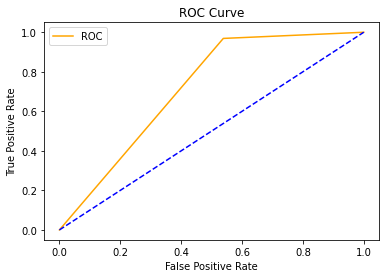

In [88]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Support Vector Machine**

In [89]:
#instantiating the model
svc=SVC()

In [90]:
#training,testing and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=5)

In [91]:
#training the data
svc.fit(x_train,y_train)

SVC()

In [92]:
#calling the function and passing the dataset for svc
metric_score(svc,x_train,x_test,y_train,y_test,train=True)
metric_score(svc,x_train,x_test,y_train,y_test,train=False)


=====Train Score=====
Accuracy Score:78.93%

=====Test Score=====
Accuracy Score:77.59%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.54      0.68        78
           1       0.72      0.97      0.83        96

    accuracy                           0.78       174
   macro avg       0.83      0.75      0.75       174
weighted avg       0.82      0.78      0.76       174


 Confusion Matrix:
 [[42 36]
 [ 3 93]]

 F1 Score:
 0.7758620689655173


In [93]:
#checking cross validation score
cv_score=cross_val_score(svc,x_new,y_new,cv=2).mean()
cv_score

0.75

In [94]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [95]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.         0.53846154 1.        ]
TPR [0.      0.96875 1.     ]
Threshold [2 1 0]


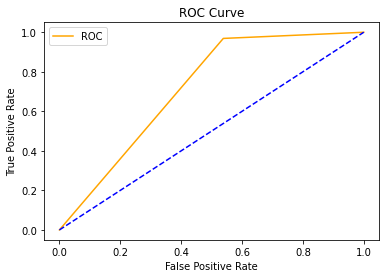

In [96]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [97]:
#Making dataframe of all the models
data=pd.DataFrame({
    'Models':['Logistic','Random Forest','Gradient Boosting','Ada','SVC'],
    'Training Score':[77.01,100,91.38,83.14,78.93],
    'Testing Score':[74.14,83.33,79.89,78.16,77.59],
    'Cross Val Score':[74.13,78.59,76.86,71.83,75],
    'F1 score':[74.13,83.33,79.88,78.16,77.86]
})
data

,Models,Training Score,Testing Score,Cross Val Score,F1 score
0,Logistic,77.01,74.14,74.13,74.13
1,Random Forest,100.00,83.33,78.59,83.33
2,Gradient Boosting,91.38,79.89,76.86,79.88
3,Ada,83.14,78.16,71.83,78.16
4,SVC,78.93,77.59,75.00,77.86


**observation**
* **In this we can see that Random forest have seem most of the data that is 100% and have the highest testing score that is 83.33%,cross validation score is also good and f1-score is very sclose to the testing score.**
* **As Random forest have seen all the data so it will be able to predict more accurately than any other model.So iam going forward with Random Forest.**

In [98]:
#Using Grid Search cv for hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV

In [99]:
param_grid=({
    'n_estimators': [100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,6,8,10],
    'criterion' :['gini', 'entropy']
})

In [103]:
grid_search=GridSearchCV(rfc,param_grid=param_grid,cv=2)

In [104]:
#Training
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [105]:
#best Parameters
grid_search.best_params_ 

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [107]:
#Training with the best parameters
rf1=RandomForestClassifier(criterion='gini',max_depth=8,max_features='sqrt',n_estimators=100)
rf1.fit(x_train,y_train)

RandomForestClassifier(max_depth=8)

In [108]:
#calling the function and passing the dataset
metric_score(rf1,x_train,x_test,y_train,y_test,train=True)#Training Score
metric_score(rf1,x_train,x_test,y_train,y_test,train=False)#Testing Score


=====Train Score=====
Accuracy Score:91.76%

=====Test Score=====
Accuracy Score:82.76%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.65      0.77        78
           1       0.78      0.97      0.86        96

    accuracy                           0.83       174
   macro avg       0.86      0.81      0.82       174
weighted avg       0.85      0.83      0.82       174


 Confusion Matrix:
 [[51 27]
 [ 3 93]]

 F1 Score:
 0.8275862068965517


In [110]:
#Checking cross validation score
cv_score=cross_val_score(rf1,x_new,y_new,cv=2)
cv_mean=cv_score.mean()
cv_mean

0.7744252873563219

**Observation**
* **So we can see that after using hyperparameter tuning score training,testing,cross validation and f1-score decreased.**
* **So iam not condidering this model, so i will be saving the random forest model without hyperparameter tuning.**

In [111]:
y_pred_prob=rfc.predict_proba(x_test)

In [112]:
#Checking AUC Score
roc_auc_score=roc_auc_score(y_test,y_pred)
roc_auc_score

0.7151442307692308

In [113]:
#saving the model
#Importing required libraries
import pickle
pickle.dump(rfc,open('Loan Prediction','wb'))